In [23]:
library(readr)
df <- read_csv("D://JD crawler//jd_reviews_senti_final.csv")
drops <- c("userName","userId","days","score","referenceId","productUrl","predictFlag")
df <- df[ , !(names(df) %in% drops)]
head(df)

Parsed with column specification:
cols(
  userId = col_character(),
  userName = col_character(),
  membershipLevel = col_character(),
  commentContent = col_character(),
  commentTime = col_character(),
  days = col_integer(),
  score = col_integer(),
  source = col_character(),
  productName = col_character(),
  referenceId = col_double(),
  productUrl = col_character(),
  imageCount = col_integer(),
  containVideo = col_logical(),
  usefulVoteCount = col_integer(),
  device = col_character(),
  sentiScore = col_double(),
  predictFlag = col_integer(),
  actualFlag = col_integer(),
  productCate = col_character()
)


membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,sentiScore,actualFlag,productCate
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<int>,<chr>,<dbl>,<int>,<chr>
Plus,这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧,2019/5/8 8:45,Android,俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码,3,FALSE,0,Mobile Phone,0.9971100,1,Clothes
4-Gold,老品牌值得信赖好用，物流相当快，好评，下次还买。,2019/6/13 17:50,Android,维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）,0,TRUE,0,Mobile Phone,1.0000000,1,Daily necessities
Plus,一直在用 还会继续回购 什么时候有赠品,2019/9/1 7:11,Android,云南白药 牙膏 180g （留兰香型）新老包装随机发货,0,FALSE,0,Mobile Phone,0.9945464,1,Daily necessities
Plus,快用完了 但效果不知道怎么样 因为是室外游泳,2019/6/19 13:17,iPhone,曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党,0,TRUE,0,Mobile Phone,0.8612527,1,Cosmetics
3-Silver,第一次用，气泡就把小零件吹起来了！,2019/9/24 20:20,Android,南极人（NANJIREN）全自动足浴盆电动高深桶加热洗脚盆 自助按摩脚泡脚机器足疗盆 （秒杀活动）十组合式自助数码屏,1,FALSE,0,Mobile Phone,0.6981536,-1,Home Appliance
Plus,质量非常好的椰子粉，大品牌，味道很不错。下回再来继续购买,2019/8/16 2:46,iPhone,海南特产 南国 营养早餐速溶饮料 咖啡伴侣 纯椰子粉320g/袋,0,FALSE,1,Mobile Phone,0.9999970,1,Food & Drinks


In [24]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	114872 obs. of  12 variables:
 $ membershipLevel: chr  "Plus" "4-Gold" "Plus" "Plus" ...
 $ commentContent : chr  "这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧" "老品牌值得信赖好用，物流相当快，好评，下次还买。" "一直在用  还会继续回购  什么时候有赠品" "快用完了 但效果不知道怎么样 因为是室外游泳" ...
 $ commentTime    : chr  "2019/5/8 8:45" "2019/6/13 17:50" "2019/9/1 7:11" "2019/6/19 13:17" ...
 $ source         : chr  "Android" "Android" "Android" "iPhone" ...
 $ productName    : chr  "俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码" "维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）" "云南白药 牙膏 180g （留兰香型）新老包装随机发货" "曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党" ...
 $ imageCount     : int  3 0 0 0 1 0 0 0 0 0 ...
 $ containVideo   : logi  FALSE TRUE FALSE TRUE FALSE FALSE ...
 $ usefulVoteCount: int  0 0 0 0 0 1 0 0 0 0 ...
 $ device         : chr  "Mobile Phone" "Mobile Phone" "Mobile Phone" "Mobile Phone" ...
 $ sentiScore     : num  0.997 1 0.995 0.861 0.698 ...
 $ actualFlag     : int  1 1 1 1 -1 1 1 1

In [3]:
# check if there are any missing values
sapply(df, function(x) sum(is.na(x)))

membershipLevel  commentContent     commentTime          source     productName 
              0               0             577               0               0 
     imageCount    containVideo usefulVoteCount          device      sentiScore 
              0               0               0               0               0 
     actualFlag     productCate 
              0               0

In [25]:
table(df$device)
table(df$source)
summary(df$sentiScore)
table(df$membershipLevel)
table(df$productCate)


Mobile Phone           PC 
      109295         5577 


        Android            iPad          iPhone              PC     QQ shopping 
          68150              24           38938            5577              67 
Wechat shopping 
           2116 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9566  0.9990  0.8882  1.0000  1.0000 


   1-Normal    2-Bronze    3-Silver      4-Gold   5-Diamond  Enterprise 
       9494        8835       13136       12768       11139         429 
       Plus Plus(trial) 
      58391         680 


           Accessories            Books & CDs                Clothes 
                  5881                   3917                   6795 
             Cosmetics      Daily necessities        Digital Product 
                  6065                   8170                  15434 
         Food & Drinks Furniture / Furnishing         Home Appliance 
                 13927                  13675                  10639 
   Industrial supplies       Maternity & Baby       Medical supplies 
                  3630                   4734                   4969 
                Others       Outdoor & Sports 
                  9426                   7610 

In [26]:
# format data
df$membershipLevel <- as.factor(df$membershipLevel)
df$device <- as.factor(df$device)
# df$score <- as.factor(df$score)
df$source <- as.factor(df$source)
# df$predictFlag <- as.factor(df$predictFlag)
# df$actualFlag <- as.factor(df$actualFlag)
df$commentTime <- as.POSIXct(df$commentTime,format="%Y/%m/%d %H:%M")
df[,"commentHour"] <- as.POSIXlt(df$commentTime)$hour
df$productCate <- as.factor(df$productCate)
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	114872 obs. of  13 variables:
 $ membershipLevel: Factor w/ 8 levels "1-Normal","2-Bronze",..: 7 4 7 7 3 7 7 5 2 7 ...
 $ commentContent : chr  "这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧" "老品牌值得信赖好用，物流相当快，好评，下次还买。" "一直在用  还会继续回购  什么时候有赠品" "快用完了 但效果不知道怎么样 因为是室外游泳" ...
 $ commentTime    : POSIXct, format: "2019-05-08 08:45:00" "2019-06-13 17:50:00" ...
 $ source         : Factor w/ 6 levels "Android","iPad",..: 1 1 1 3 1 3 3 1 6 3 ...
 $ productName    : chr  "俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码" "维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）" "云南白药 牙膏 180g （留兰香型）新老包装随机发货" "曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党" ...
 $ imageCount     : int  3 0 0 0 1 0 0 0 0 0 ...
 $ containVideo   : logi  FALSE TRUE FALSE TRUE FALSE FALSE ...
 $ usefulVoteCount: int  0 0 0 0 0 1 0 0 0 0 ...
 $ device         : Factor w/ 2 levels "Mobile Phone",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sentiScore     : num  0.997 1 0.995 0.861 0.698 ...
 $ actualFlag 

In [27]:
library(dplyr)
# filter(df, device == 'PC') %>% summarize(PC_mean = mean(predictScore))
mutate(df) %>%
 group_by(device) %>%
 summarize(mean_sentiScore = mean(sentiScore, na.rm = TRUE), count = n())
mutate(df) %>%
 group_by(source) %>%
 summarize(mean_sentiScore = mean(sentiScore, na.rm = TRUE), count = n())
mutate(df) %>%
 group_by(productCate) %>%
 summarize(mean_sentiScore = mean(sentiScore, na.rm = TRUE), count = n())

target <- c('1-Normal','2-Bronze','3-Silver','4-Gold','5-Diamond')
memberdf <- filter(df, membershipLevel %in% target)
mutate(memberdf) %>%
 group_by(membershipLevel) %>%
 summarize(mean_sentiScore = mean(sentiScore, na.rm = TRUE), count = n())

mutate(df) %>%
 summarise(extremely_positive_percentage_total = sum(sentiScore == 1)/n(), extremely_negative_percentage_total = sum(sentiScore == 0)/n())

mutate(df) %>%
 summarise(positive_percentage_total = sum(sentiScore >= 0.6)/n(), negative_percentage_total = sum(sentiScore < 0.6)/n())

mutate(df) %>%
 group_by(device) %>%
 summarise(extremely_positive_percentage = sum(sentiScore == 1)/n(), extremely_negative_percentage = sum(sentiScore == 0)/n())

mutate(df) %>%
 group_by(device) %>%
 summarise(positive_percentage = sum(sentiScore >= 0.6)/n(), negative_percentage = sum(sentiScore < 0.6)/n())


device,mean_sentiScore,count
<fct>,<dbl>,<int>
Mobile Phone,0.8893337,109295
PC,0.8651192,5577


source,mean_sentiScore,count
<fct>,<dbl>,<int>
Android,0.8927584,68150
iPad,0.7914724,24
iPhone,0.8895735,38938
PC,0.8651192,5577
QQ shopping,0.7811302,67
Wechat shopping,0.7791582,2116


productCate,mean_sentiScore,count
<fct>,<dbl>,<int>
Accessories,0.8980643,5881
Books & CDs,0.7792069,3917
Clothes,0.9291672,6795
Cosmetics,0.9344713,6065
Daily necessities,0.9211970,8170
Digital Product,0.8443382,15434
Food & Drinks,0.9224178,13927
Furniture / Furnishing,0.8607350,13675
Home Appliance,0.8878582,10639


membershipLevel,mean_sentiScore,count
<fct>,<dbl>,<int>
1-Normal,0.9084081,9494
2-Bronze,0.8543992,8835
3-Silver,0.8548751,13136
4-Gold,0.8630462,12768
5-Diamond,0.8760883,11139


extremely_positive_percentage_total,extremely_negative_percentage_total
<dbl>,<dbl>
0.06224319,0.01246605


positive_percentage_total,negative_percentage_total
<dbl>,<dbl>
0.8900167,0.1099833


device,extremely_positive_percentage,extremely_negative_percentage
<fct>,<dbl>,<dbl>
Mobile Phone,0.06067066,0.01203166
PC,0.09306079,0.02097902


device,positive_percentage,negative_percentage
<fct>,<dbl>,<dbl>
Mobile Phone,0.8911753,0.1088247
PC,0.8673122,0.1326878


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9566  0.9990  0.8882  1.0000  1.0000 

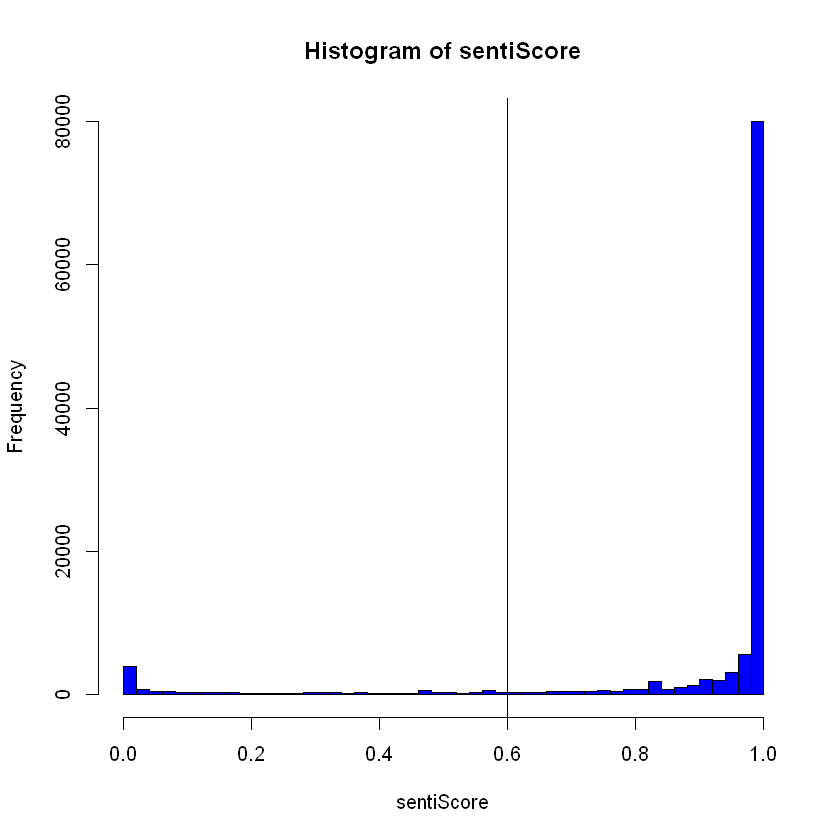

In [11]:
attach(df) 
summary(sentiScore)
# hist(predictScore, xlab = "Credit Month", ylab = "Frequency", main = " ", cex=0.4)
hist(sentiScore, col = "blue", breaks = 50)
abline(v=0.6)
# boxplot(predictScore, bty="n",xlab = "sentiment score", cex=0.4)
# hist(days, col = "green", breaks = 50)


In [9]:
# boxplot(days, horizontal = TRUE, axes = FALSE, staplewex = 1)
# text(x = boxplot.stats(days)$stats, labels = boxplot.stats(days)$stats, y = 1.25)
# summary(days)

In [10]:
# df$cmTimeBins <- cut(df$days, breaks=c(-10,0,3,7,14,30,141), labels=c("minus 0 ","3 days","one week","two weeks","one month","one month later"))

In [11]:
# mutate(df) %>%
#  group_by(cmTimeBins) %>%
#  summarize(sentiScore = mean(predictScore, na.rm = TRUE), count = n())

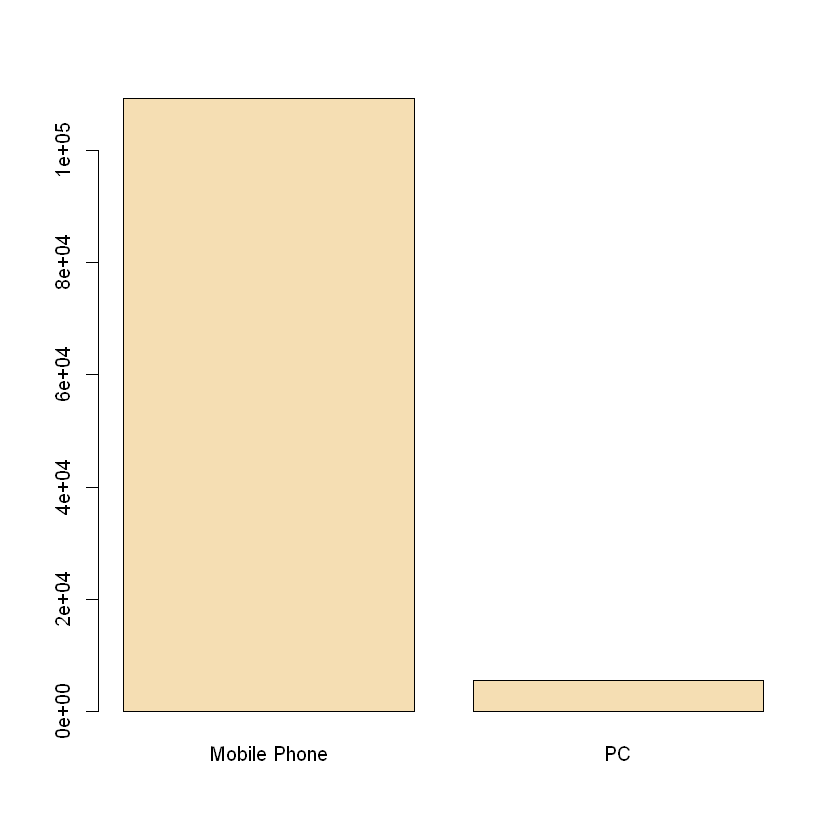

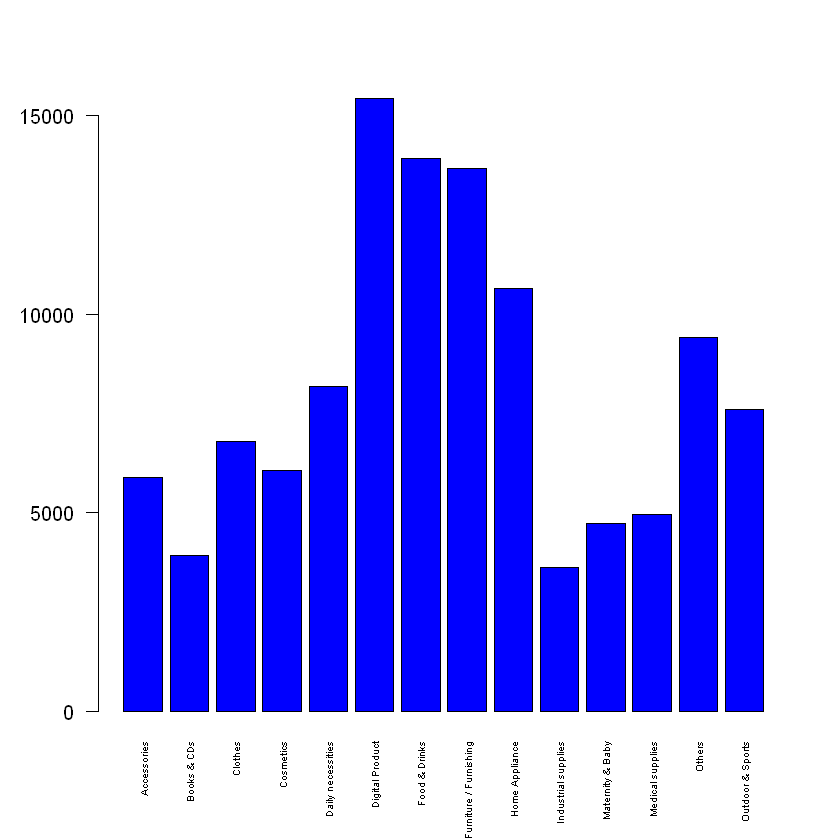

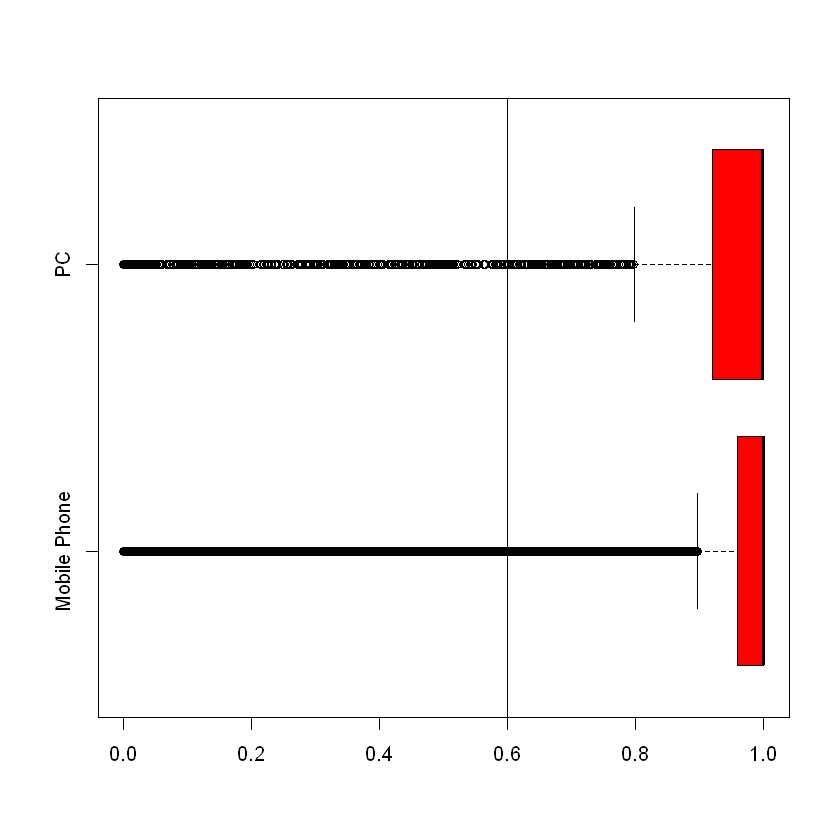

In [32]:
table(device) %>% barplot(col = "wheat")
table(productCate) %>% barplot(col = "blue", las=2, cex.names=0.5)
boxplot(sentiScore ~device, data = df, col = "red", horizontal = TRUE)
abline(v=0.6)

In [33]:
# PCdf <- filter(df, device == 'PC')
# MBdf <- filter(df, device == 'Mobile Phone')
df$commentHour <- as.factor(df$commentHour)
df2 <- na.omit(df)
df2 <- mutate(df2) %>%
 group_by(commentHour) %>%
 summarise(MB_PC = sum(device == "Mobile Phone")/sum(device == "PC"), PC_MB= sum(device == "PC")/sum(device == "Mobile Phone"))
head(df2)

commentHour,MB_PC,PC_MB
<fct>,<dbl>,<dbl>
0,30.42029,0.03287280
1,25.78788,0.03877791
2,23.43750,0.04266667
3,27.00000,0.03703704
4,125.00000,0.00800000
5,44.80000,0.02232143


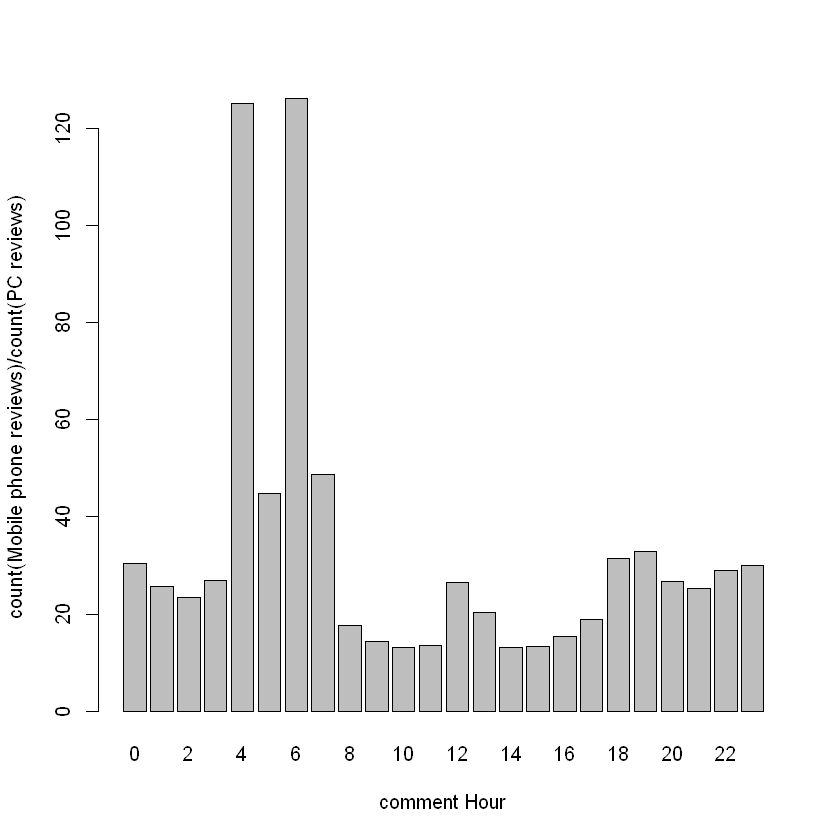

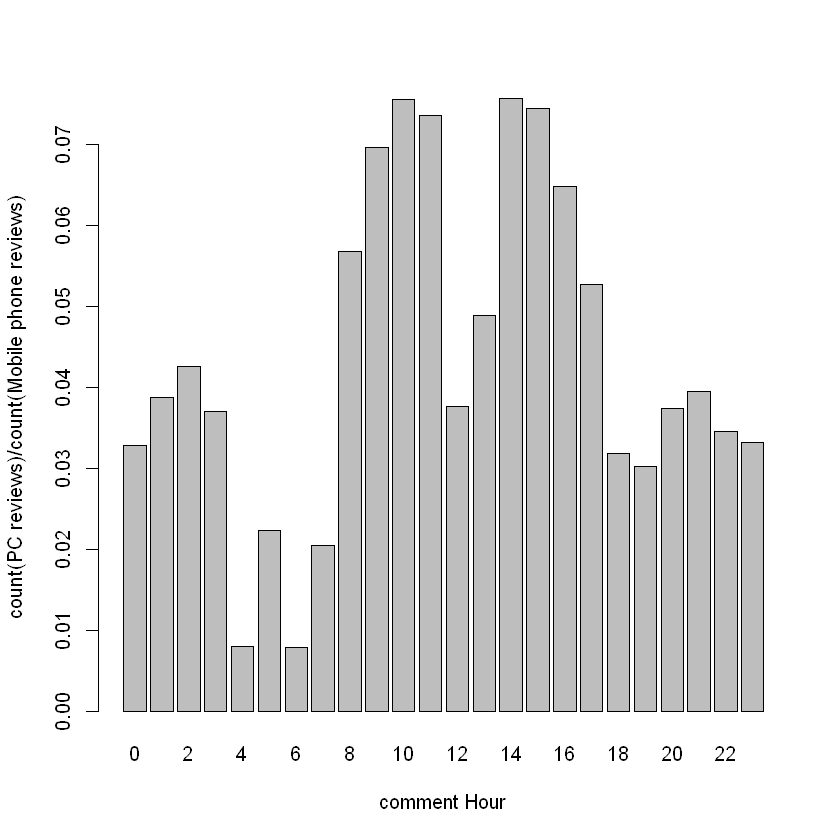

In [34]:
library(ggplot2)
barplot(df2$MB_PC, xlab='comment Hour', ylab = "count(Mobile phone reviews)/count(PC reviews)", names.arg = df2$commentHour)
barplot(df2$PC_MB, xlab='comment Hour', ylab = "count(PC reviews)/count(Mobile phone reviews)", names.arg = df2$commentHour)
# table(df2$cyl, mtcars$gear, dnn=c("Cylinders", "Gears"))
# barplot(df2, ylab="Frequency", xlab="Gears", main="Side-By-Side Bar Chart", col=c("PC_prec", "MB_prec" ), beside=TRUE, width=.3)

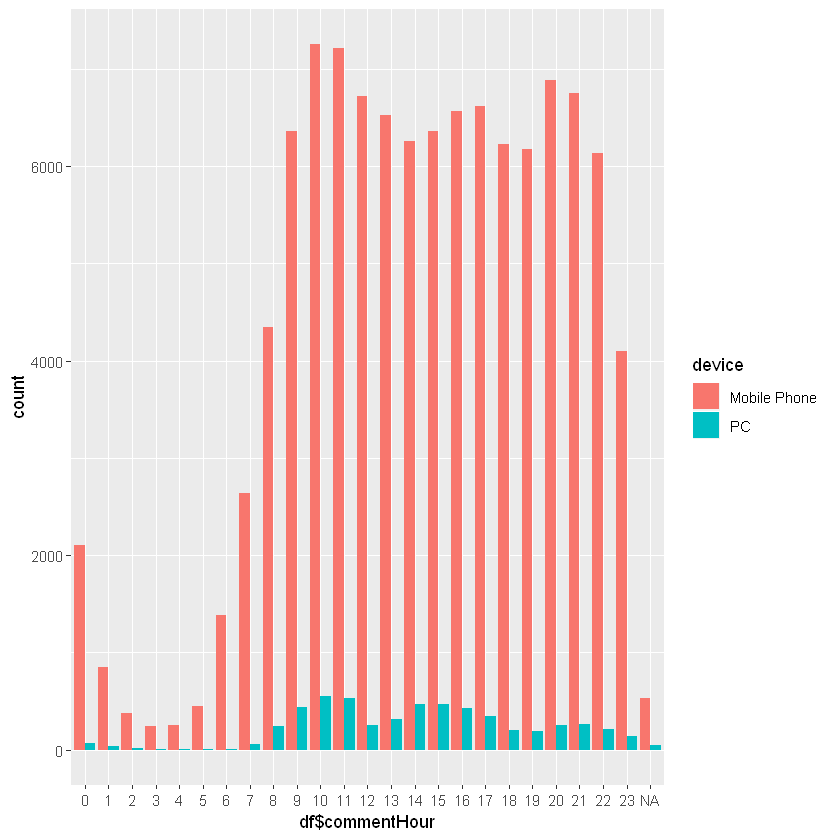

In [35]:
ggplot(df, aes(df$commentHour, ..count..)) + geom_bar(aes(fill = device), position = "dodge") 

In [36]:
library(stringi)
library(stringr)
wordCount <- function(x) {  
    word <- gsub("\r?\n|\r", " ", x)
    word <- stri_stats_latex(word)[1]
    wordCount <- as.numeric(str_extract_all(word, "[0-9]+"))
    return(wordCount)
}
df$commentLen <- sapply(df$commentContent, wordCount)

In [37]:
tail(df)
df$commentHour <- as.integer(df$commentHour)

membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,sentiScore,actualFlag,productCate,commentHour,commentLen
<fct>,<chr>,<dttm>,<fct>,<chr>,<int>,<lgl>,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
Plus,活着 可口可乐具体土豪贴脸,2019-08-11 11:14:00,iPhone,余华作品：活着,1,FALSE,0,Mobile Phone,0.9326953,1,Books & CDs,11,12
3-Silver,容量很大，携带方便，小巧玲珑，很好用。,2019-09-20 08:57:00,Android,壹号公路 20000毫安 镜面大容量充电宝 数显移动电源 双USB输出 适用于苹果/安卓/小米/华为通用,0,FALSE,0,Mobile Phone,0.9999991,1,Digital Product,8,15
4-Gold,垫子还可以，大小颜色都喜欢，唯一不足的放下去与车地板会移动，垫子背面没有防滑倒刺。,2019-08-30 10:59:00,iPhone,车丽友 全包围丝圈汽车脚垫 大众新途观L科鲁泽荣威i5I6宝来雷凌缤智XRV英朗福睿斯科沃兹缤越哈弗M6F7H4定制,0,FALSE,0,Mobile Phone,0.9878570,1,Others,10,37
4-Gold,这个延时的已经买好多次了，比普通的确实能延时好久，对象很喜欢呢。你们说该怎么办？,2019-04-24 07:05:00,Android,杜蕾斯 避孕套 安全套 持久12只 延时持久型 套套 男用 成人用品 原装进口 Durex,0,FALSE,0,Mobile Phone,0.9993948,1,Medical supplies,7,36
2-Bronze,一般吧，就那样，一分钱一分货,2019-06-16 13:47:00,iPhone,梵地亚（Vantiiear）万向轮拉杆箱耐磨抗摔24英寸旅行箱男女行李箱 蓝色,0,FALSE,0,Mobile Phone,0.6783716,1,Others,13,12
Plus,准确度很好，速度快&hellip;,2019-07-31 14:19:00,Android,米特尔（MITIR）探针式厨房食品温度计油温计婴儿奶温计水温计电子温度计 TP600 （白色）,1,FALSE,0,Mobile Phone,0.9999242,1,Medical supplies,14,14


Warning message:
"Ignoring unknown parameters: title"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Ignoring unknown parameters: title"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


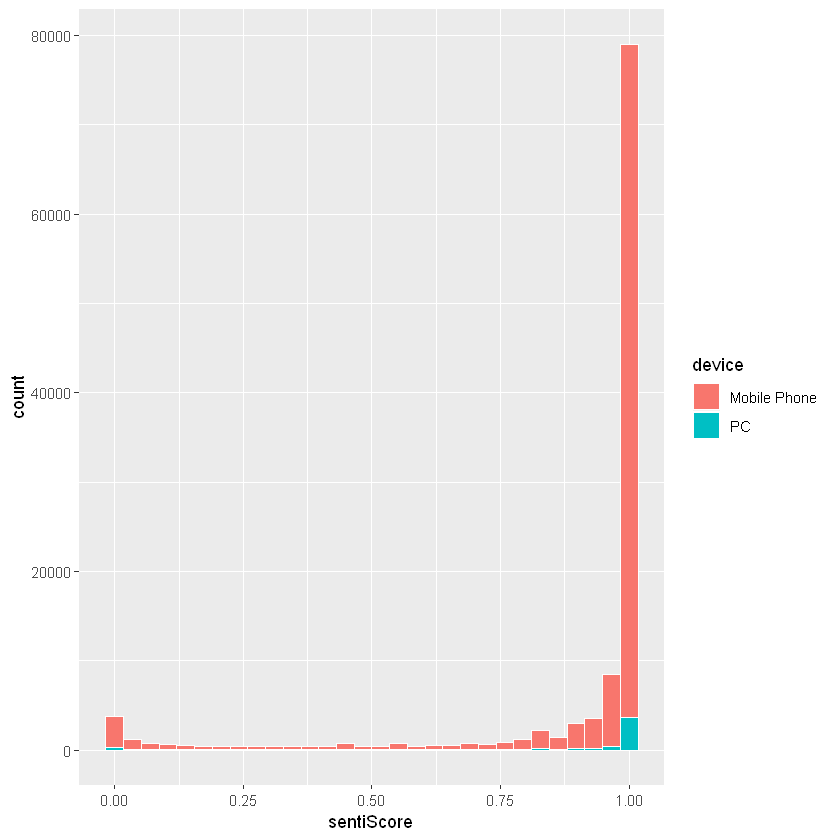

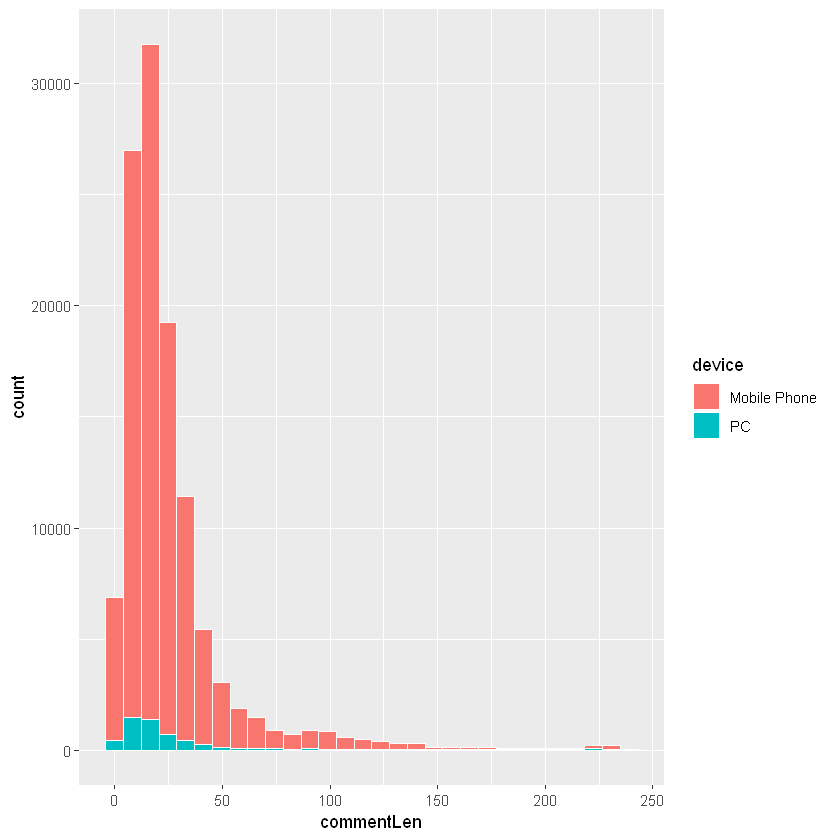

In [38]:
ggplot()+geom_histogram(data=df,aes(sentiScore,..count..,fill=device),color='white', title = "distribution of sentiment score")
ggplot()+geom_histogram(data=df,aes(commentLen,..count..,fill=device),color='white', title = "distribution of comment length")

device,mean_commentLength,count
<fct>,<dbl>,<int>
Mobile Phone,25.77098,109295
PC,32.49955,5577


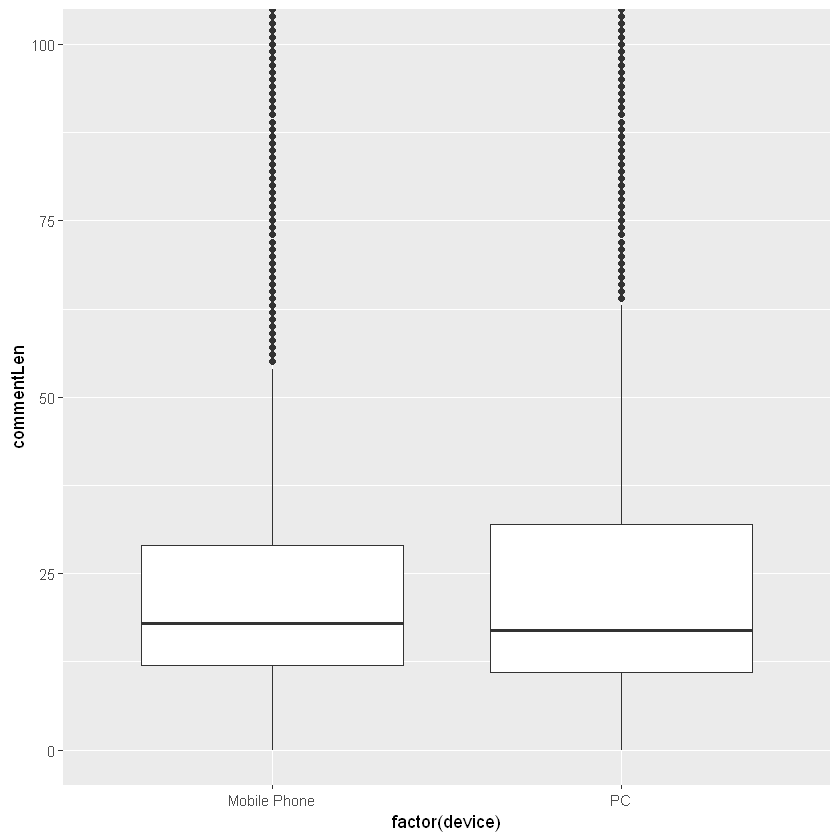

In [40]:
mutate(df) %>%
 group_by(device) %>%
 summarize(mean_commentLength = mean(commentLen, na.rm = TRUE), count = n())
ggplot(df, aes(factor(device), commentLen)) + geom_boxplot() + coord_cartesian(ylim = c(0, 100))

In [21]:
mutate(df) %>%
 group_by(device) %>%
 summarize(usefulVoteCount = mean(usefulVoteCount, na.rm = TRUE), count = n())

device,usefulVoteCount,count
<fct>,<dbl>,<int>
Mobile Phone,0.1316163,109295
PC,0.2992648,5577


In [41]:
head(df)

membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,sentiScore,actualFlag,productCate,commentHour,commentLen
<fct>,<chr>,<dttm>,<fct>,<chr>,<int>,<lgl>,<int>,<fct>,<dbl>,<int>,<fct>,<int>,<dbl>
Plus,这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧,2019-05-08 08:45:00,Android,俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码,3,FALSE,0,Mobile Phone,0.9971100,1,Clothes,9,24
4-Gold,老品牌值得信赖好用，物流相当快，好评，下次还买。,2019-06-13 17:50:00,Android,维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）,0,TRUE,0,Mobile Phone,1.0000000,1,Daily necessities,18,20
Plus,一直在用 还会继续回购 什么时候有赠品,2019-09-01 07:11:00,Android,云南白药 牙膏 180g （留兰香型）新老包装随机发货,0,FALSE,0,Mobile Phone,0.9945464,1,Daily necessities,8,17
Plus,快用完了 但效果不知道怎么样 因为是室外游泳,2019-06-19 13:17:00,iPhone,曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党,0,TRUE,0,Mobile Phone,0.8612527,1,Cosmetics,14,20
3-Silver,第一次用，气泡就把小零件吹起来了！,2019-09-24 20:20:00,Android,南极人（NANJIREN）全自动足浴盆电动高深桶加热洗脚盆 自助按摩脚泡脚机器足疗盆 （秒杀活动）十组合式自助数码屏,1,FALSE,0,Mobile Phone,0.6981536,-1,Home Appliance,21,15
Plus,质量非常好的椰子粉，大品牌，味道很不错。下回再来继续购买,2019-08-16 02:46:00,iPhone,海南特产 南国 营养早餐速溶饮料 咖啡伴侣 纯椰子粉320g/袋,0,FALSE,1,Mobile Phone,0.9999970,1,Food & Drinks,3,25


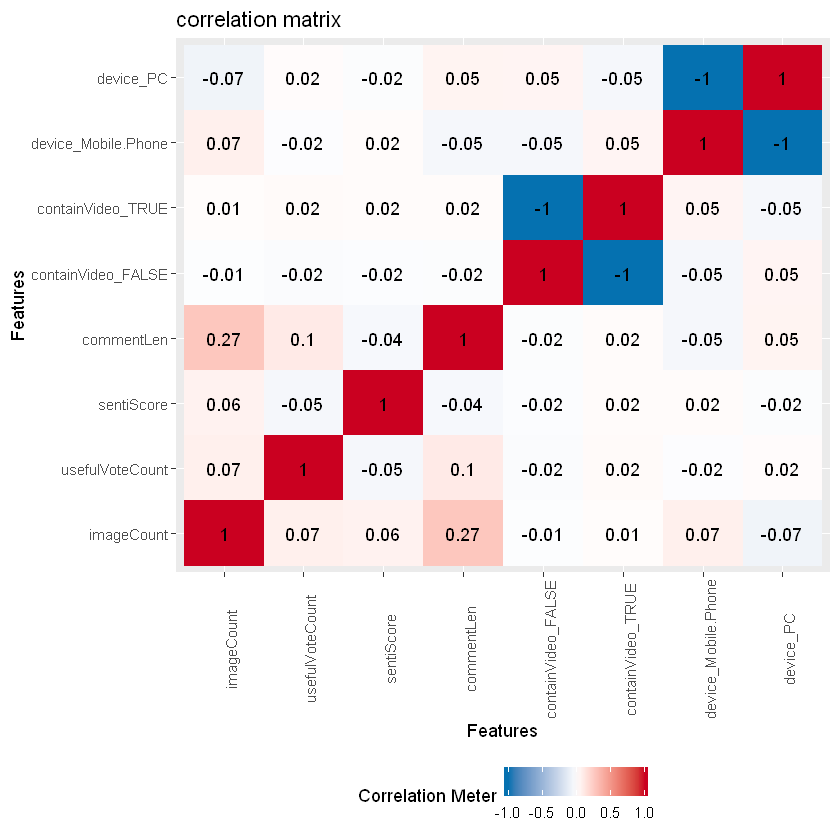

In [44]:
library("DataExplorer")
plot_correlation(df[c(6,7,8,9,10,14)], maxcat = 20L, title= 'correlation matrix')

membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,sentiScore,actualFlag,productCate,commentHour,commentLen
<fct>,<chr>,<dttm>,<fct>,<chr>,<int>,<lgl>,<int>,<fct>,<dbl>,<int>,<fct>,<int>,<dbl>
Plus,这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧,2019-05-08 08:45:00,Android,俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码,3,FALSE,0,Mobile Phone,0.9971100,1,Clothes,9,24
4-Gold,老品牌值得信赖好用，物流相当快，好评，下次还买。,2019-06-13 17:50:00,Android,维达(Vinda) 抽纸 超韧3层130抽软抽*24包纸巾(小规格) 整箱销售（新旧产品随机发货）,0,TRUE,0,Mobile Phone,1.0000000,1,Daily necessities,18,20
Plus,一直在用 还会继续回购 什么时候有赠品,2019-09-01 07:11:00,Android,云南白药 牙膏 180g （留兰香型）新老包装随机发货,0,FALSE,0,Mobile Phone,0.9945464,1,Daily necessities,8,17
Plus,快用完了 但效果不知道怎么样 因为是室外游泳,2019-06-19 13:17:00,iPhone,曼秀雷敦新碧进口双重保湿防晒露防晒霜乳男女 SPF50+ 80g 长效持久 隔离紫外线 耐水耐汗小金帽 学生党,0,TRUE,0,Mobile Phone,0.8612527,1,Cosmetics,14,20
3-Silver,第一次用，气泡就把小零件吹起来了！,2019-09-24 20:20:00,Android,南极人（NANJIREN）全自动足浴盆电动高深桶加热洗脚盆 自助按摩脚泡脚机器足疗盆 （秒杀活动）十组合式自助数码屏,1,FALSE,0,Mobile Phone,0.6981536,-1,Home Appliance,21,15
Plus,质量非常好的椰子粉，大品牌，味道很不错。下回再来继续购买,2019-08-16 02:46:00,iPhone,海南特产 南国 营养早餐速溶饮料 咖啡伴侣 纯椰子粉320g/袋,0,FALSE,1,Mobile Phone,0.9999970,1,Food & Drinks,3,25


rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
114872,14,8,6,0,1158,114293,1608208,25661368


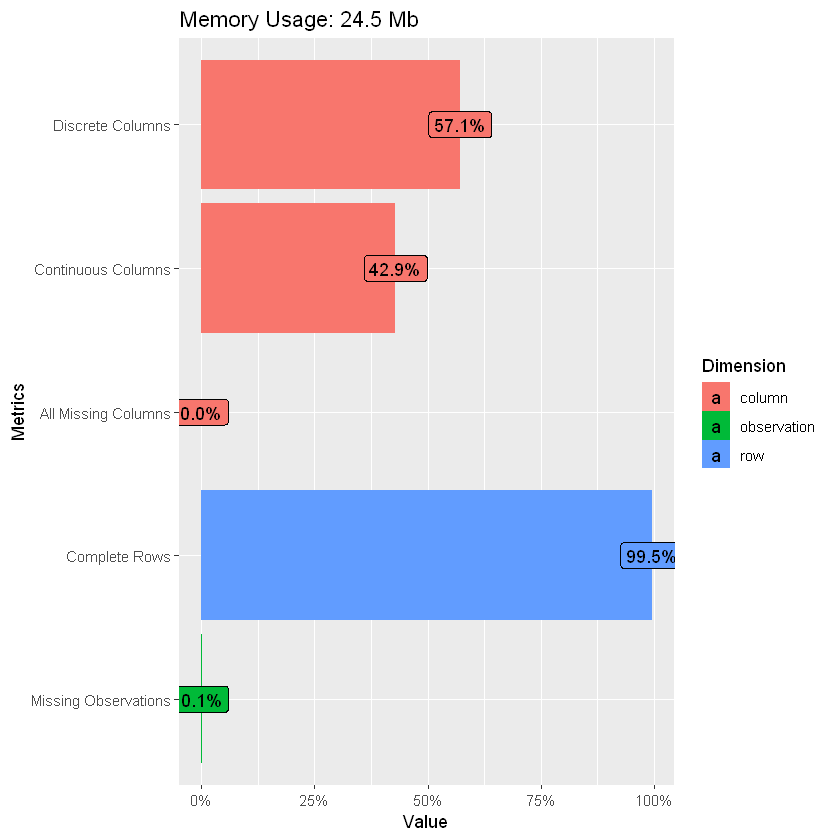

3 columns ignored with more than 50 categories.
commentContent: 107944 categories
commentTime: 85533 categories
productName: 248 categories



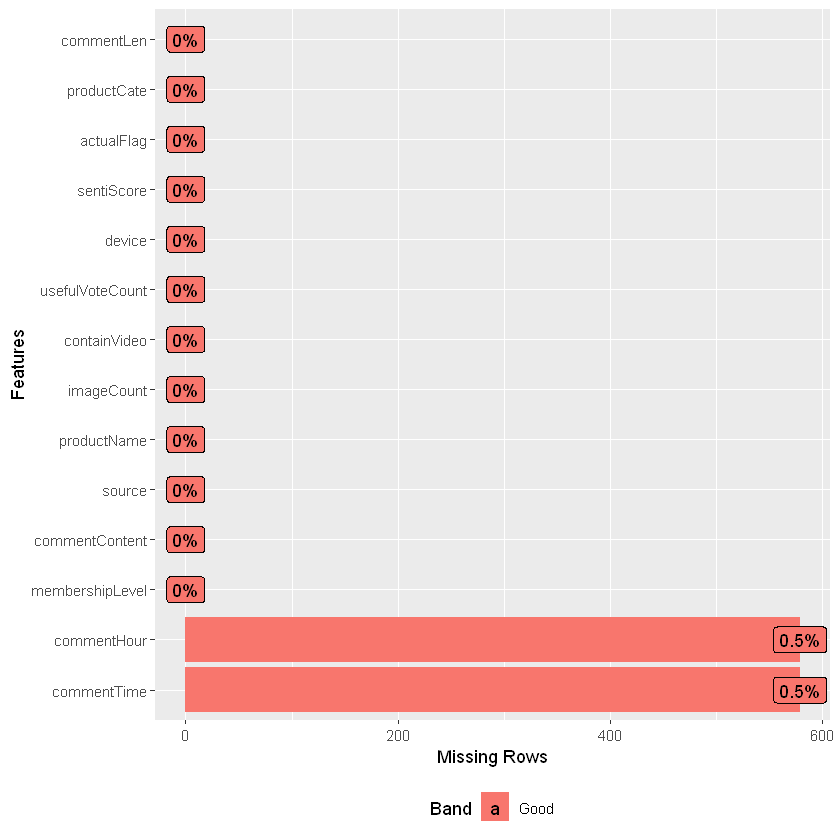

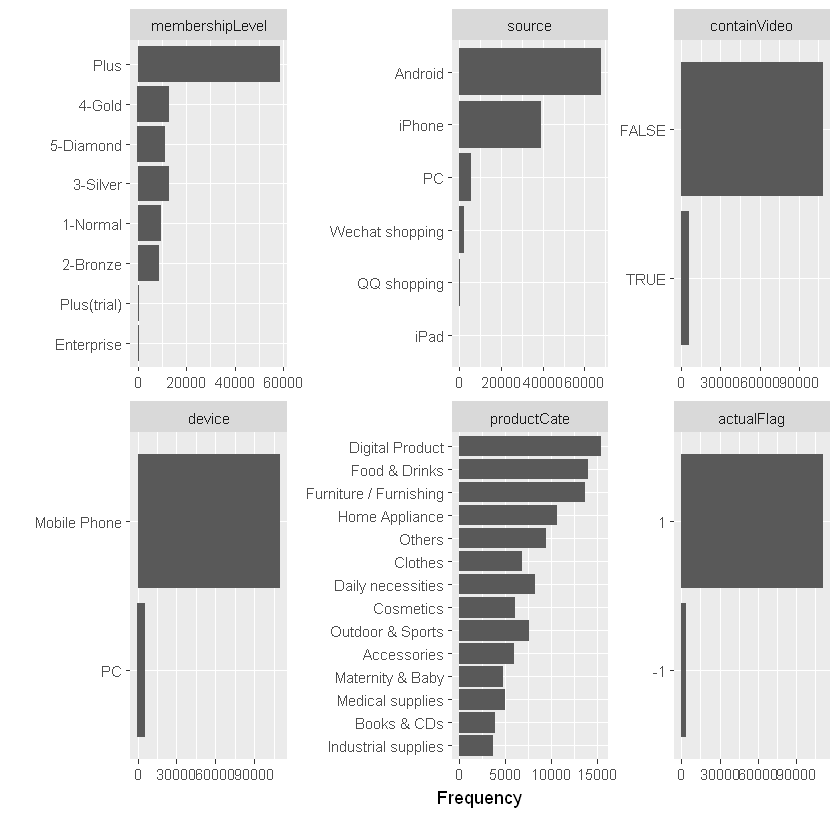

In [45]:
#exploratory data analysis using DataExplorer
head(df)
introduce(df)
plot_intro(df)
plot_missing(df)
plot_bar(df, binary_as_factor = TRUE)

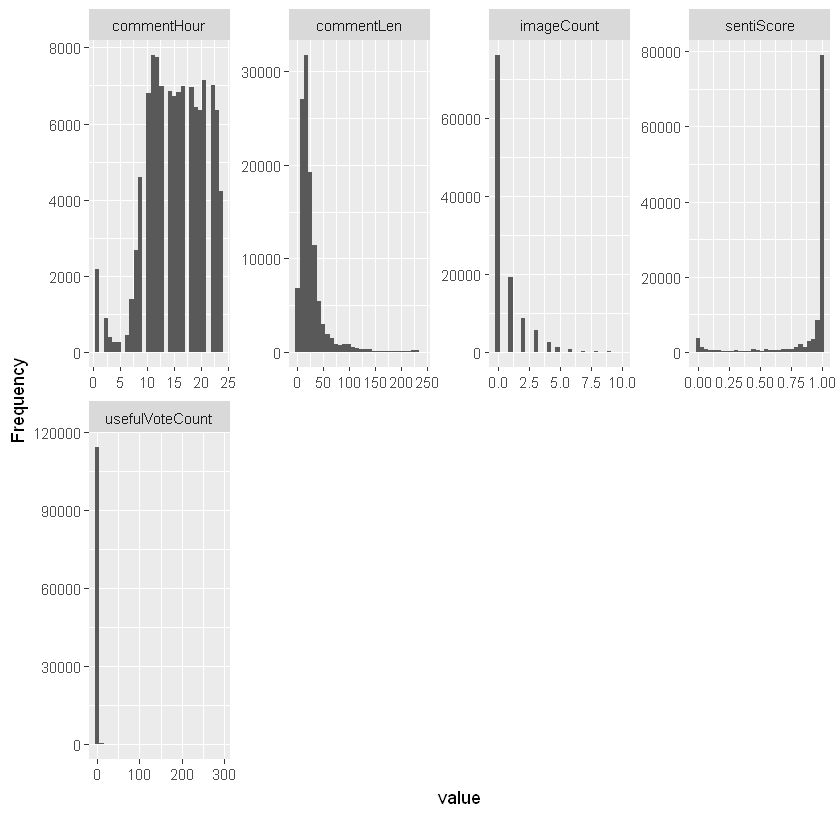

In [51]:
plot_histogram(df)

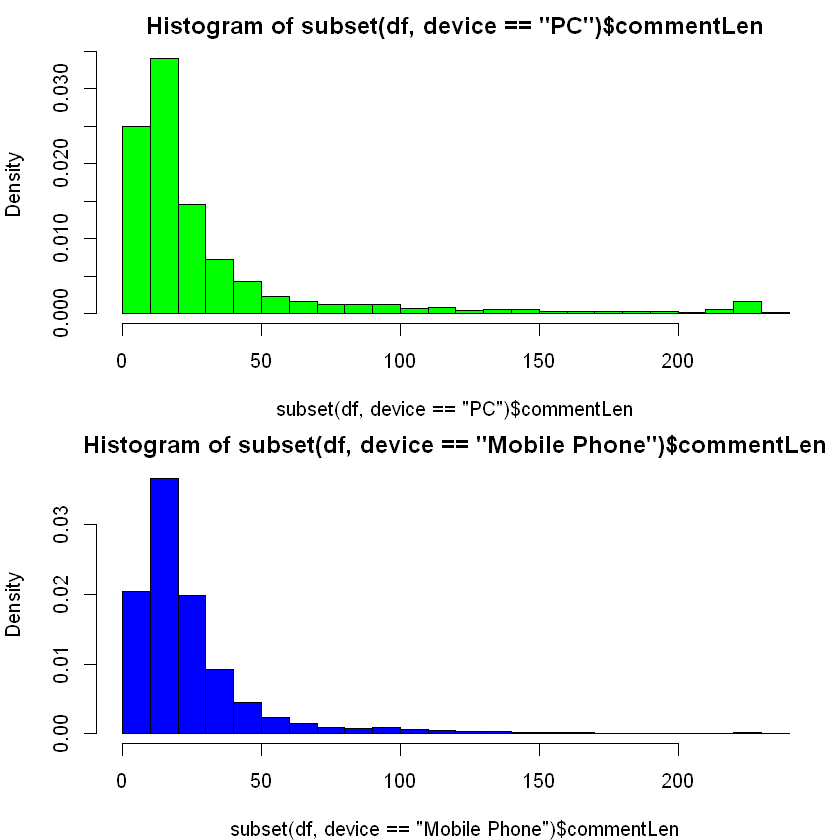

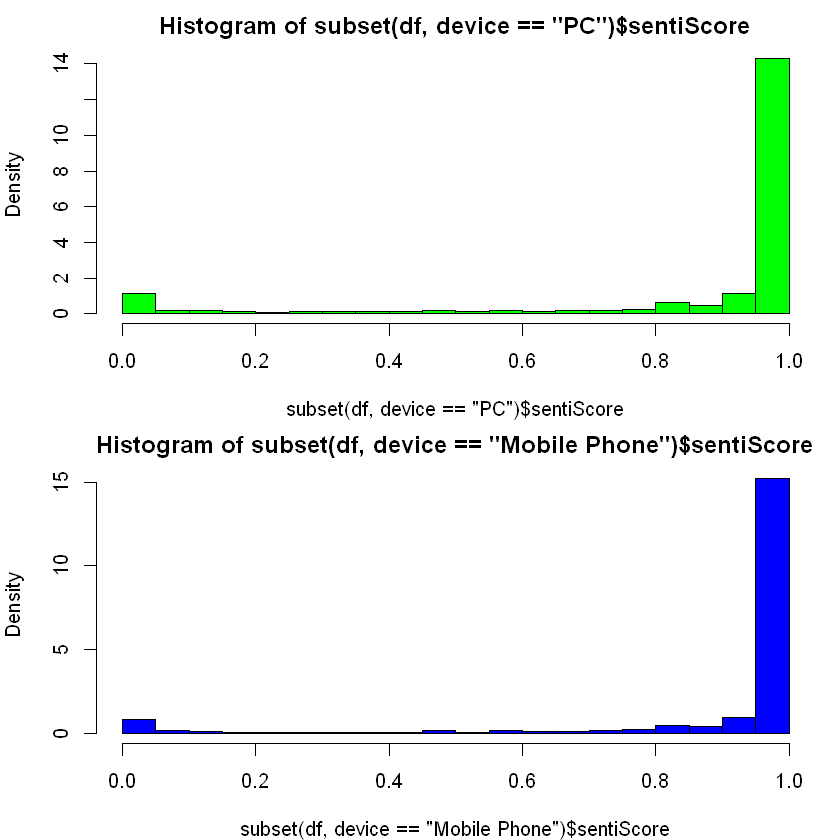

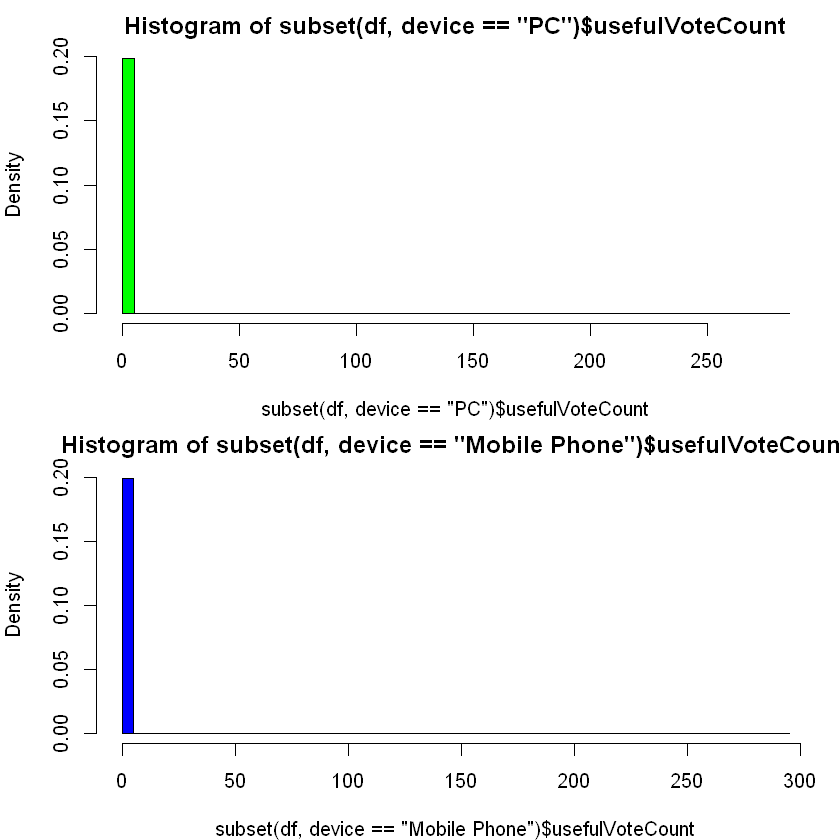

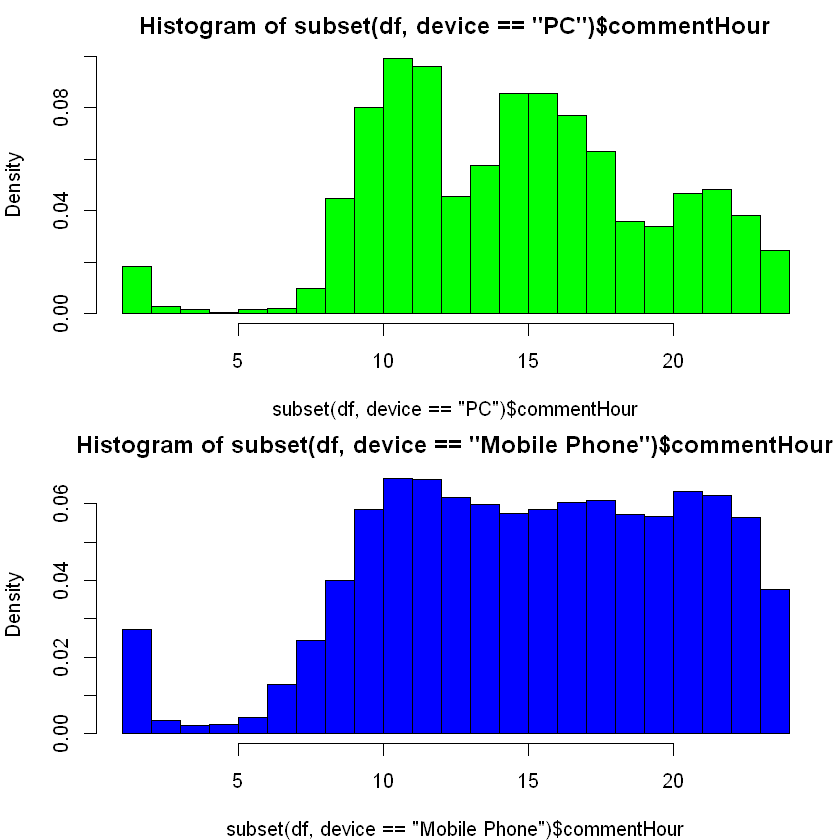

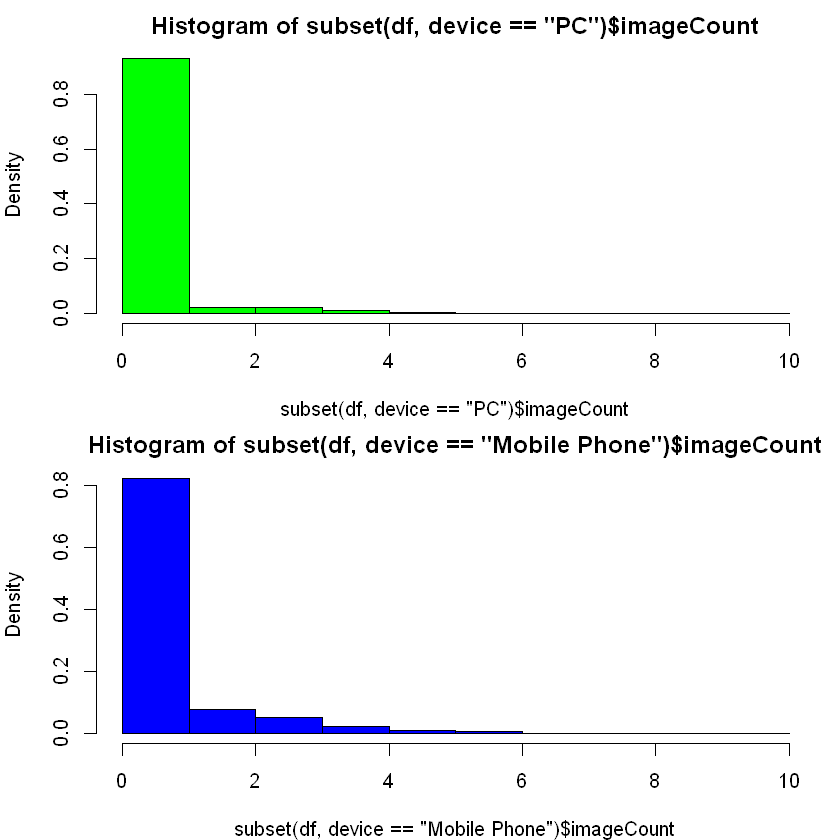

In [47]:
par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$commentLen, col = "green", breaks = 30, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$commentLen, col = "blue", breaks = 30, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$sentiScore, col = "green", breaks = 30, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$sentiScore, col = "blue", breaks = 30, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$usefulVoteCount, col = "green", breaks = 100, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$usefulVoteCount, col = "blue", breaks = 100, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$commentHour, col = "green", breaks = 24, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$commentHour, col = "blue", breaks = 24, freq=FALSE)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
hist(subset(df, device == "PC")$imageCount, col = "green", breaks = 10, freq=FALSE)
hist(subset(df, device == "Mobile Phone")$imageCount, col = "blue", breaks = 10, freq=FALSE)

In [52]:
df_cov <- c('imageCount', 'usefulVoteCount', 'commentLen', 'sentiScore')
df %>%
  group_by(productCate) %>%
  select(one_of(df_cov)) %>%
  summarise_all(funs(mean(., na.rm = T)))

Adding missing grouping variables: `productCate`


productCate,imageCount,usefulVoteCount,commentLen,sentiScore
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Accessories,0.4757694,0.09828260,19.02653,0.8980643
Books & CDs,0.3163135,0.02757212,22.07940,0.7792069
Clothes,0.3368653,0.15908756,23.36218,0.9291672
Cosmetics,0.8718879,0.10338005,29.55565,0.9344713
Daily necessities,0.6638923,0.01542228,25.69461,0.9211970
Digital Product,0.7578074,0.37028638,31.96605,0.8443382
Food & Drinks,0.8344941,0.06943347,27.00352,0.9224178
Furniture / Furnishing,0.4419744,0.06851920,21.70289,0.8607350
Home Appliance,0.8223517,0.11674030,28.74509,0.8878582


In [53]:
#propensity score matching
df_cov <- c('imageCount', 'usefulVoteCount', 'commentLen', 'sentiScore','device')
df %>%
  group_by(device) %>%
  select(one_of(df_cov)) %>%
  summarise_all(funs(mean(., na.rm = T)))

#t-test
with(df, t.test(imageCount ~ device))
with(df, t.test(usefulVoteCount ~ device))
with(df, t.test(commentLen ~ device))
with(df, t.test(sentiScore ~ device))

device,imageCount,usefulVoteCount,commentLen,sentiScore
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Mobile Phone,0.7115605,0.1316163,25.77098,0.8893337
PC,0.2820513,0.2992648,32.49955,0.8651192



	Welch Two Sample t-test

data:  imageCount by device
t = 31.604, df = 6611.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4028681 0.4561503
sample estimates:
mean in group Mobile Phone           mean in group PC 
                 0.7115605                  0.2820513 



	Welch Two Sample t-test

data:  usefulVoteCount by device
t = -2.2801, df = 5638, p-value = 0.02264
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.31178668 -0.02351046
sample estimates:
mean in group Mobile Phone           mean in group PC 
                 0.1316163                  0.2992648 



	Welch Two Sample t-test

data:  commentLen by device
t = -11.25, df = 5796, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.901101 -5.556048
sample estimates:
mean in group Mobile Phone           mean in group PC 
                  25.77098                   32.49955 



	Welch Two Sample t-test

data:  sentiScore by device
t = 6.2553, df = 6052.3, p-value = 4.238e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01662595 0.03180311
sample estimates:
mean in group Mobile Phone           mean in group PC 
                 0.8893337                  0.8651192 


In [54]:
df$treat <- recode(df$device, "PC"="1", "Mobile Phone" = "0")
str(df$treat)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [55]:
head(df,1)

membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,sentiScore,actualFlag,productCate,commentHour,commentLen,treat
<fct>,<chr>,<dttm>,<fct>,<chr>,<int>,<lgl>,<int>,<fct>,<dbl>,<int>,<fct>,<int>,<dbl>,<fct>
Plus,这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧,2019-05-08 08:45:00,Android,俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码,3,FALSE,0,Mobile Phone,0.99711,1,Clothes,9,24,0


In [66]:
write.csv(df, file ="D:/JD crawler/reviews_pre_match.csv")

ERROR: Error in write_csv(df, file = "D:/JD crawler/reviews_pre_match.csv"): 参数没有用(file = "D:/JD crawler/reviews_pre_match.csv")


In [28]:
#install.packages("MatchIt")

package 'MatchIt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hanwen\AppData\Local\Temp\Rtmp02Fwvx\downloaded_packages



Call:
matchit(formula = treat ~ usefulVoteCount + imageCount + membershipLevel + 
    commentLen + productCate, data = df3, method = "nearest", 
    ratio = 1)

Summary of balance for all data:
                                  Means Treated Means Control SD Control
distance                                 0.0847        0.0465     0.0375
usefulVoteCount                          0.3011        0.1321     1.8087
imageCount                               0.2828        0.7131     1.2872
membershipLevel1-Normal                  0.0181        0.0857     0.2800
membershipLevel2-Bronze                  0.0353        0.0789     0.2696
membershipLevel3-Silver                  0.0689        0.1166     0.3210
membershipLevel4-Gold                    0.0923        0.1120     0.3154
membershipLevel5-Diamond                 0.1576        0.0930     0.2905
membershipLevelEnterprise                0.0241        0.0026     0.0509
membershipLevelPlus                      0.6007        0.5050     0.5000
me

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

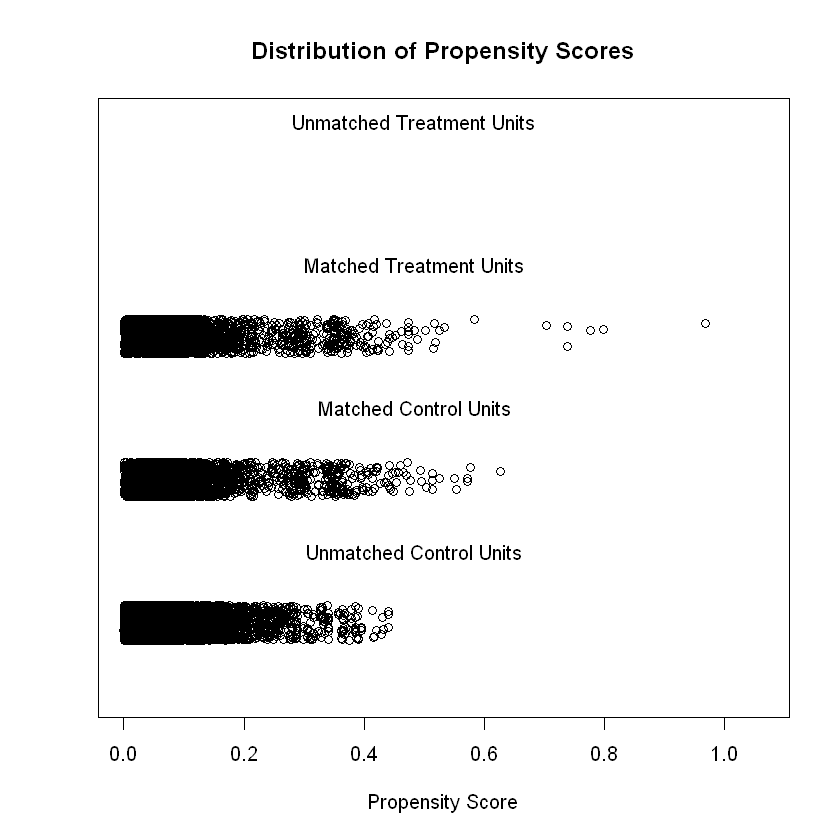

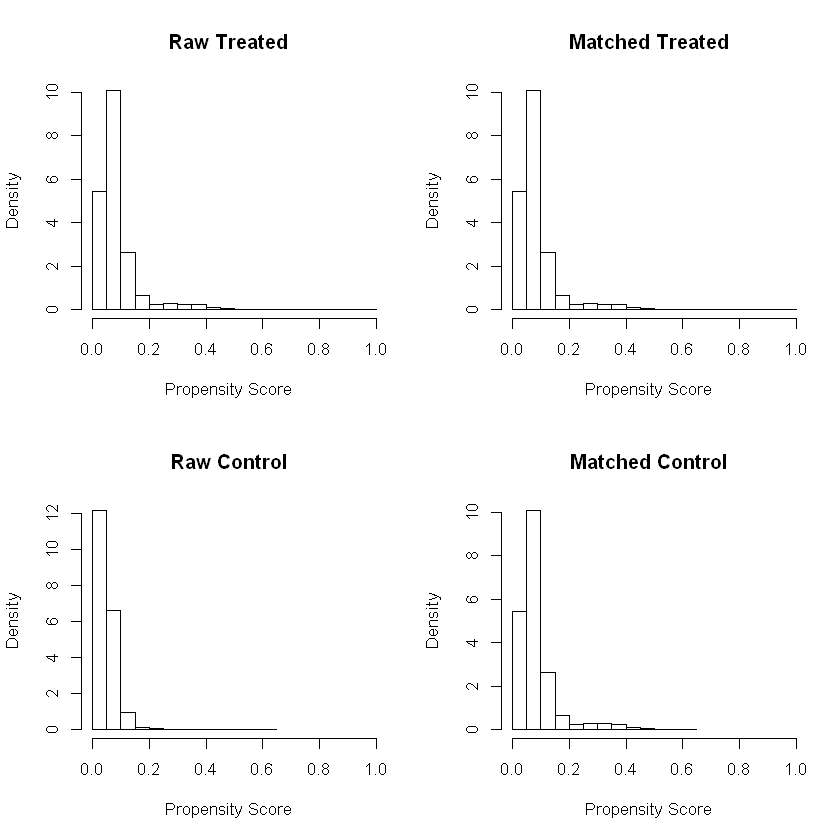

In [57]:
library(MatchIt)
df3 <- na.omit(df)
pcm.out = matchit(treat ~ usefulVoteCount + imageCount + membershipLevel + commentLen + productCate, data = df3, method = "nearest",ratio = 1)
summary(pcm.out)
plot(pcm.out, type = "jitter")
plot(pcm.out, type = "hist")

In [67]:
pcm.data <- match.data(pcm.out)
# write.csv(pcm.data, file ="D:/JD crawler/propensity score matching/pcm_output.csv")

ERROR: Error in write.table(pcm.data, file = "D:/JD crawler/propensity score matching/pcm_output.csv", : 参数没有用(locale = locale(encoding = stringi::stri_enc_get()))


In [42]:
attach(pcm.data)
ecls_cov <- c('usefulVoteCount' , 'imageCount', 'commentLen')
pcm.data %>%
  group_by(treat) %>%
  select(one_of(ecls_cov)) %>%
  summarise_all(funs(mean))


The following objects are masked from pcm.data (pos = 3):

    actualFlag, commentContent, commentHour, commentLen, commentTime,
    containVideo, device, distance, imageCount, membershipLevel,
    predictScore, productName, source, treat, usefulVoteCount, weights

The following objects are masked from pcm.data (pos = 4):

    actualFlag, commentContent, commentHour, commentLen, commentTime,
    containVideo, device, distance, imageCount, membershipLevel,
    predictScore, productName, source, treat, usefulVoteCount, weights

The following objects are masked from df (pos = 5):

    actualFlag, commentContent, commentHour, commentLen, commentTime,
    containVideo, device, imageCount, membershipLevel, predictScore,
    productName, source, treat, usefulVoteCount

The following objects are masked from df (pos = 11):

    actualFlag, commentContent, commentHour, commentTime, containVideo,
    device, imageCount, membershipLevel, predictScore, productName,
    source, usefulVoteCount

Addi

treat,usefulVoteCount,imageCount,commentLen
<fct>,<dbl>,<dbl>,<dbl>
0,0.2218202,0.2601773,32.22779
1,0.3010675,0.2827936,32.58802


In [44]:
lapply(ecls_cov, function(v) {
    t.test(pcm.data[, v] ~ pcm.data[, 'treat'])
})

[[1]]

	Welch Two Sample t-test

data:  pcm.data[, v] by pcm.data[, "treat"]
t = -0.79948, df = 10910, p-value = 0.424
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2735466  0.1150519
sample estimates:
mean in group 0 mean in group 1 
      0.2218202       0.3010675 


[[2]]

	Welch Two Sample t-test

data:  pcm.data[, v] by pcm.data[, "treat"]
t = -1.2708, df = 10971, p-value = 0.2038
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05750000  0.01226751
sample estimates:
mean in group 0 mean in group 1 
      0.2601773       0.2827936 


[[3]]

	Welch Two Sample t-test

data:  pcm.data[, v] by pcm.data[, "treat"]
t = -0.42803, df = 11051, p-value = 0.6686
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.009920  1.289457
sample estimates:
mean in group 0 mean in group 1 
       32.22779        32.58802 

